<a href="https://colab.research.google.com/github/robins645/ML_Project/blob/main/capsuleendoscopy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import files
uploaded = files.upload()

Saving archive (1).zip to archive (1).zip


In [6]:
import zipfile
import io

zip_ref = zipfile.ZipFile(io.BytesIO(uploaded['archive (1).zip']), 'r')
zip_ref.extractall('Biological_Image')  # optional: specify a folder name
zip_ref.close()

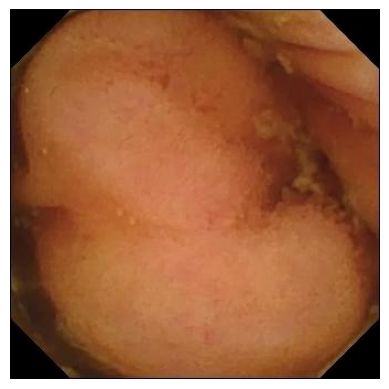

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# Define path to one image
image_path = 'Biological_Image/Kvasir-Capsule/annotated_images/131368cc17e44240....jpg'  # replace with actual filename

# Load and display
img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis('off')
plt.show()


In [8]:
import os

# List files in the extracted directory
extracted_dir = 'Biological_Image'  # Replace with the actual extracted directory name if different
for root, dirs, files in os.walk(extracted_dir):
    for name in files:
        print(os.path.join(root, name))

Biological_Image/Kvasir-Capsule/2104.11138.pdf
Biological_Image/Kvasir-Capsule/images/131368cc17e44240_28982.jpg
Biological_Image/Kvasir-Capsule/images/131368cc17e44240_28976.jpg
Biological_Image/Kvasir-Capsule/images/131368cc17e44240_29001.jpg
Biological_Image/Kvasir-Capsule/images/131368cc17e44240_28964.jpg
Biological_Image/Kvasir-Capsule/images/131368cc17e44240_28960.jpg
Biological_Image/Kvasir-Capsule/images/131368cc17e44240_28962.jpg
Biological_Image/Kvasir-Capsule/images/131368cc17e44240_29011.jpg
Biological_Image/Kvasir-Capsule/images/131368cc17e44240_28971.jpg
Biological_Image/Kvasir-Capsule/images/131368cc17e44240_28978.jpg
Biological_Image/Kvasir-Capsule/images/131368cc17e44240_29004.jpg
Biological_Image/Kvasir-Capsule/images/131368cc17e44240_29006.jpg
Biological_Image/Kvasir-Capsule/images/131368cc17e44240_29014.jpg
Biological_Image/Kvasir-Capsule/images/131368cc17e44240_28965.jpg
Biological_Image/Kvasir-Capsule/images/131368cc17e44240_29009.jpg
Biological_Image/Kvasir-Capsu

In [12]:
from PIL import Image

# Count total images
print(f"Total images: {len(image_files)}")

# Check image size
img = Image.open(image_files[0])
print(f"Image size: {img.size}")

Total images: 55
Image size: (336, 336)


In [13]:
import os

image_files = []
extracted_dir = 'Biological_Image/Kvasir-Capsule/images' # Update this to your image directory
for root, dirs, files in os.walk(extracted_dir):
    for name in files:
        if name.lower().endswith(('.png', '.jpg', '.jpeg', '.gif')):
            image_files.append(os.path.join(root, name))

In [14]:
import numpy as np

# Resize and normalize
img = img.resize((128, 128))  # example size
img_array = np.array(img) / 255.0  # normalize


In [15]:
from PIL import Image

# Check size of first few images
for i, path in enumerate(image_files[:5]):
    with Image.open(path) as img:
        print(f"{os.path.basename(path)}: {img.size}")


131368cc17e44240_28982.jpg: (336, 336)
131368cc17e44240_28976.jpg: (336, 336)
131368cc17e44240_29001.jpg: (336, 336)
131368cc17e44240_28964.jpg: (336, 336)
131368cc17e44240_28960.jpg: (336, 336)


In [16]:
bad_files = []

for path in image_files:
    try:
        img = Image.open(path)
        img.verify()  # will raise an exception if the image is broken
    except:
        bad_files.append(path)

print(f"Corrupt images: {len(bad_files)}")


Corrupt images: 0


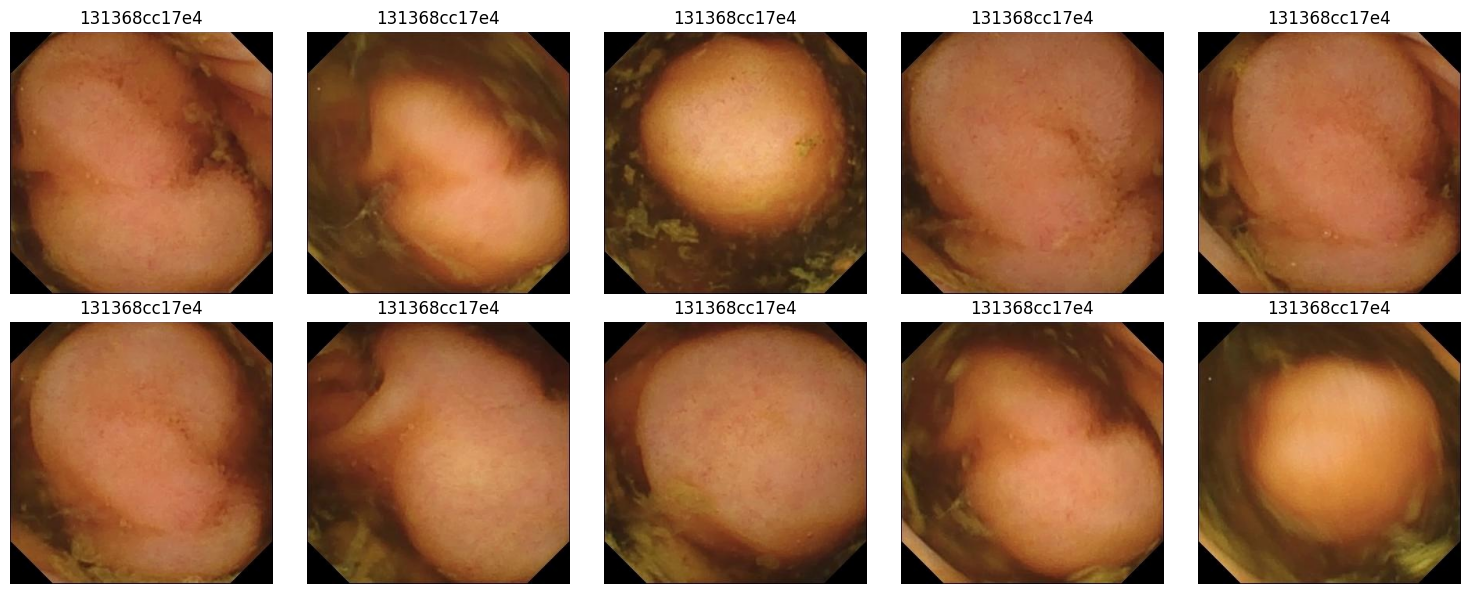

In [17]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 5, figsize=(15, 6))
for i, ax in enumerate(axs.flat):
    img = Image.open(image_files[i])
    ax.imshow(img)
    ax.set_title(os.path.basename(image_files[i])[:12])
    ax.axis('off')
plt.tight_layout()
plt.show()


In [19]:
import os
from glob import glob

image_dir = 'Biological_Image/Kvasir-Capsule/annotated_images/'
mask_dir = 'Biological_Image/Kvasir-Capsule/masks/'  # Update this if mask folder is different

# List all images and masks
image_files = sorted(glob(image_dir + '*.jpg'))
mask_files = sorted(glob(mask_dir + '*.jpg'))  # or .png depending on file type

# Pair by filename
image_mask_pairs = []

for img_path in image_files:
    base = os.path.basename(img_path)
    mask_path = os.path.join(mask_dir, base)
    if os.path.exists(mask_path):
        image_mask_pairs.append((img_path, mask_path))

print(f"Found {len(image_mask_pairs)} image–mask pairs.")

Found 55 image–mask pairs.


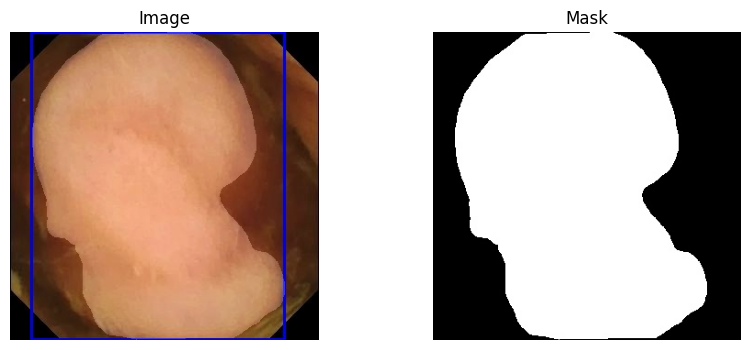

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

img_path, mask_path = image_mask_pairs[0]

img = np.array(Image.open(img_path))
mask = np.array(Image.open(mask_path))

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(mask, cmap='gray')
plt.title("Mask")
plt.axis('off')

plt.show()


In [24]:
import os
from glob import glob

# Set paths
image_dir = 'Biological_Image/Kvasir-Capsule/annotated_images/'
mask_dir = 'Biological_Image/Kvasir-Capsule/masks/'  # <-- change if needed

# Get image and mask paths
image_files = sorted(glob(image_dir + '*.jpg'))
mask_files = sorted(glob(mask_dir + '*.jpg'))  # or .png

# Match by filename
image_mask_pairs = []
for img_path in image_files:
    filename = os.path.basename(img_path)
    mask_path = os.path.join(mask_dir, filename)
    if os.path.exists(mask_path):
        image_mask_pairs.append((img_path, mask_path))

print(f"✅ Found {len(image_mask_pairs)} image–mask pairs.")

✅ Found 55 image–mask pairs.


In [22]:
import numpy as np
from PIL import Image

def preprocess_image_mask(img_path, mask_path, size=(128, 128)):
    # Load and resize
    image = Image.open(img_path).resize(size)
    mask = Image.open(mask_path).resize(size)

    # Normalize image to [0,1], convert mask to binary (0 or 1)
    image = np.array(image) / 255.0
    mask = np.array(mask)
    if len(mask.shape) == 3:  # if mask is RGB, convert to grayscale
        mask = mask[:, :, 0]
    mask = (mask > 127).astype(np.uint8)

    return image, mask


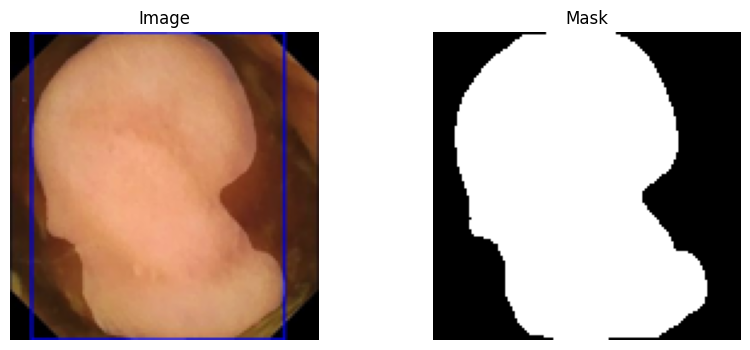

In [25]:
import matplotlib.pyplot as plt

# Pick one pair
img_path, mask_path = image_mask_pairs[0]
image, mask = preprocess_image_mask(img_path, mask_path)

# Plot
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(mask, cmap='gray')
plt.title("Mask")
plt.axis('off')
plt.show()


In [26]:
!pip install -q albumentations


In [27]:
import albumentations as A
from albumentations.pytorch import ToTensorV2  # Only if you're using PyTorch
import cv2

# Define augmentation pipeline
transform = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.3),
    A.RandomRotate90(p=0.5),
    A.ShiftScaleRotate(shift_limit=0.05, scale_limit=0.1, rotate_limit=20, p=0.5),
    A.RandomBrightnessContrast(p=0.3),
    A.ElasticTransform(p=0.2),
])


/usr/local/lib/python3.11/dist-packages/albumentations/core/validation.py:114: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)


In [28]:
def augment_image_mask(image, mask):
    # Albumentations expects images as uint8 numpy arrays
    augmented = transform(image=image, mask=mask)
    return augmented['image'], augmented['mask']


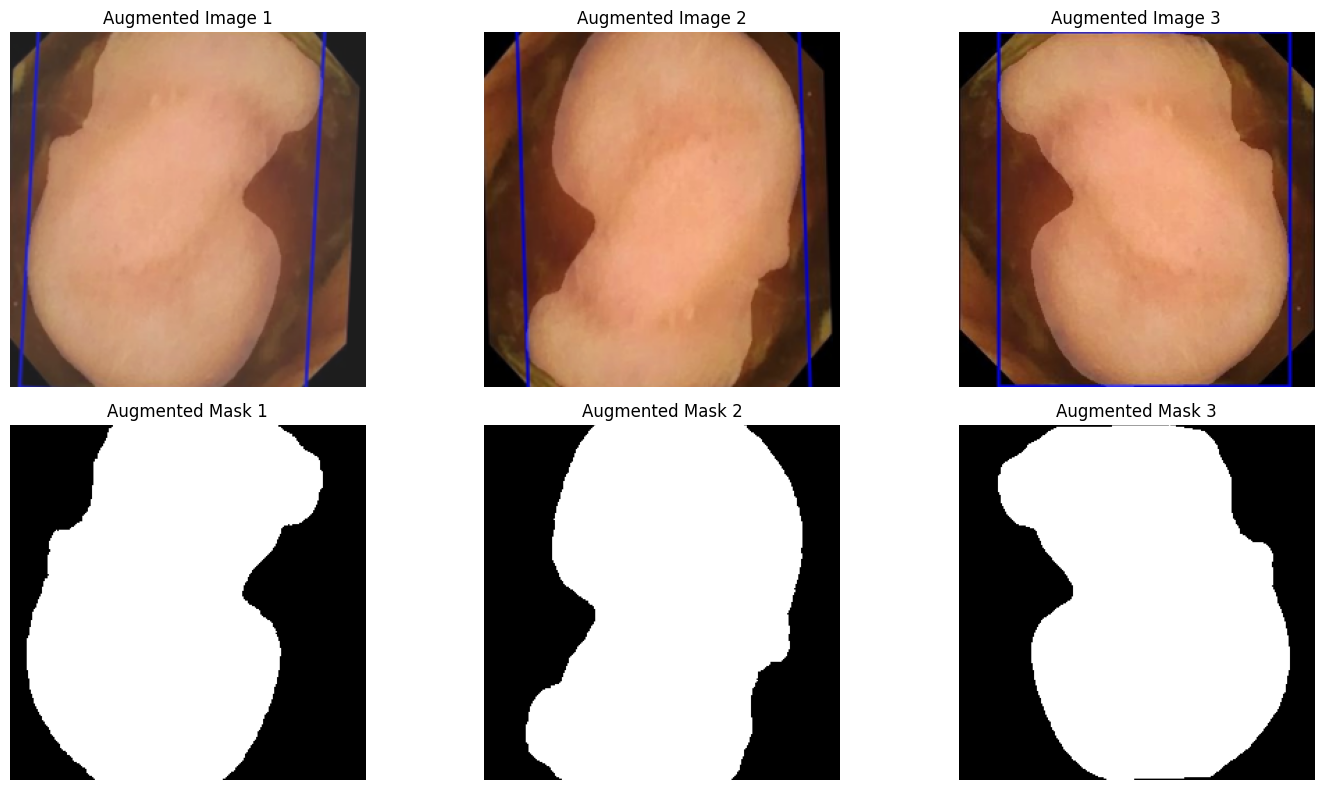

In [29]:
# Load one pair
img_path, mask_path = image_mask_pairs[0]
image, mask = preprocess_image_mask(img_path, mask_path, size=(256, 256))
image = (image * 255).astype('uint8')  # albumentations requires uint8
mask = (mask * 255).astype('uint8')

# Generate augmented versions
fig, axs = plt.subplots(2, 3, figsize=(15, 8))

for i in range(3):
    aug_img, aug_mask = augment_image_mask(image, mask)

    axs[0, i].imshow(aug_img)
    axs[0, i].set_title(f'Augmented Image {i+1}')
    axs[0, i].axis('off')

    axs[1, i].imshow(aug_mask, cmap='gray')
    axs[1, i].set_title(f'Augmented Mask {i+1}')
    axs[1, i].axis('off')

plt.tight_layout()
plt.show()


In [30]:
import tensorflow as tf
import albumentations as A
import cv2
import numpy as np
import os

class SegmentationDataGenerator(tf.keras.utils.Sequence):
    def __init__(self, image_mask_pairs, batch_size=8, img_size=(128, 128), augment=False, shuffle=True):
        self.image_mask_pairs = image_mask_pairs
        self.batch_size = batch_size
        self.img_size = img_size
        self.augment = augment
        self.shuffle = shuffle
        self.on_epoch_end()

        # Define augmentation
        self.transform = A.Compose([
            A.HorizontalFlip(p=0.5),
            A.VerticalFlip(p=0.3),
            A.RandomRotate90(p=0.5),
            A.ShiftScaleRotate(shift_limit=0.05, scale_limit=0.1, rotate_limit=20, p=0.5),
            A.RandomBrightnessContrast(p=0.3),
            A.ElasticTransform(p=0.2),
        ])

    def __len__(self):
        return len(self.image_mask_pairs) // self.batch_size

    def __getitem__(self, index):
        batch_pairs = self.image_mask_pairs[index * self.batch_size:(index + 1) * self.batch_size]
        images, masks = zip(*[self._load_pair(img, msk) for img, msk in batch_pairs])
        return np.array(images), np.array(masks)

    def on_epoch_end(self):
        if self.shuffle:
            np.random.shuffle(self.image_mask_pairs)

    def _load_pair(self, img_path, mask_path):
        img = cv2.imread(img_path)
        img = cv2.resize(img, self.img_size)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
        mask = cv2.resize(mask, self.img_size)
        mask = (mask > 127).astype(np.uint8)

        if self.augment:
            augmented = self.transform(image=img, mask=mask)
            img = augmented['image']
            mask = augmented['mask']

        # Normalize to [0, 1]
        img = img.astype(np.float32) / 255.0
        mask = np.expand_dims(mask, axis=-1)  # add channel for binary segmentation

        return img, mask


In [31]:
from sklearn.model_selection import train_test_split

# Split your dataset
train_pairs, val_pairs = train_test_split(image_mask_pairs, test_size=0.2, random_state=42)

# Create generators
train_gen = SegmentationDataGenerator(train_pairs, batch_size=8, img_size=(128, 128), augment=True)
val_gen = SegmentationDataGenerator(val_pairs, batch_size=8, img_size=(128, 128), augment=False)


/usr/local/lib/python3.11/dist-packages/albumentations/core/validation.py:114: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)


In [33]:
import tensorflow as tf
from tensorflow.keras import layers, models

def build_unet(input_shape=(128, 128, 3)):
    inputs = layers.Input(input_shape)

    # Encoder
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    p1 = layers.MaxPooling2D((2, 2))(c1)

    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c2)
    p2 = layers.MaxPooling2D((2, 2))(c2)

    c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c3)
    p3 = layers.MaxPooling2D((2, 2))(c3)

    # Bottleneck
    c4 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(p3)
    c4 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(c4)

    # Decoder
    u5 = layers.UpSampling2D((2, 2))(c4)
    u5 = layers.concatenate([u5, c3])
    c5 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(u5)
    c5 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c5)

    u6 = layers.UpSampling2D((2, 2))(c5)
    u6 = layers.concatenate([u6, c2])
    c6 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(u6)
    c6 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c6)

    u7 = layers.UpSampling2D((2, 2))(c6)
    u7 = layers.concatenate([u7, c1])
    c7 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(u7)
    c7 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c7)

    outputs = layers.Conv2D(1, (1, 1), activation='sigmoid')(c7)

    model = models.Model(inputs=[inputs], outputs=[outputs])
    return model



In [34]:
model = build_unet(input_shape=(128, 128, 3))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [36]:
model.fit(train_gen,
          validation_data=val_gen,
          epochs=100)


Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 66s 13s/step - accuracy: 0.9642 - loss: 0.1108 - val_accuracy: 0.9629 - val_loss: 0.0933
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 65s 13s/step - accuracy: 0.9322 - loss: 0.1617 - val_accuracy: 0.9749 - val_loss: 0.0687
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 66s 13s/step - accuracy: 0.9458 - loss: 0.1425 - val_accuracy: 0.9524 - val_loss: 0.1301
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 64s 13s/step - accuracy: 0.9433 - loss: 0.1462 - val_accuracy: 0.9632 - val_loss: 0.0897
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 66s 13s/step - accuracy: 0.9584 - loss: 0.1087 - val_accuracy: 0.9622 - val_loss: 0.0925
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 66s 13s/step - accuracy: 0.9539 - loss: 0.1105 - val_accuracy: 0.9688 - val_loss: 0.0728
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 66s 13s/step - accuracy: 0.9544 - loss: 0.1206 - val_accuracy: 0.9723 - val_loss: 0.0735
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 65s 13s/step - accuracy: 0.9575 - loss: 0.1086 - val_accuracy: 0.9650 - val_loss:

In [37]:
print("Number of original training images:", len(train_pairs))
print("Number of original validation images:", len(val_pairs))


Number of original training images: 44
Number of original validation images: 11


In [38]:
print("Effective training images per epoch (augmented):", len(train_gen) * train_gen.batch_size)


Effective training images per epoch (augmented): 40
